In [24]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [25]:
# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

In [37]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

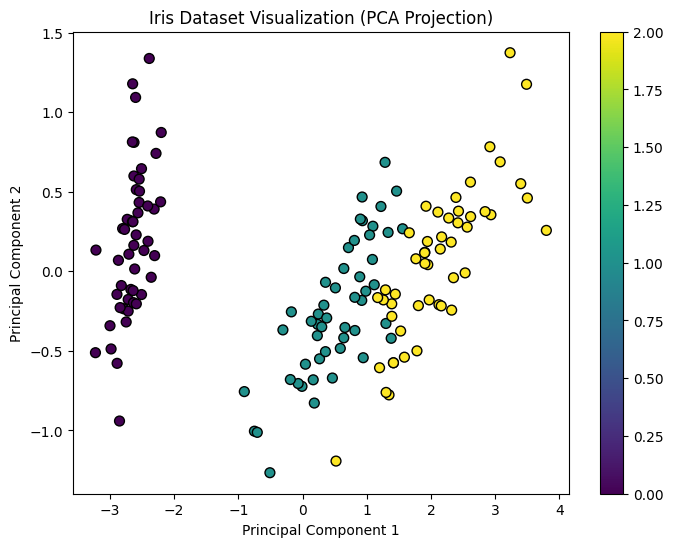

In [26]:
# Visualize the original data using PCA for 2D projection
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Iris Dataset Visualization (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

In [27]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Initialize the k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

In [12]:
# Fit the classifier on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
# Make predictions on the test data
y_pred = knn.predict(X_test)

In [14]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


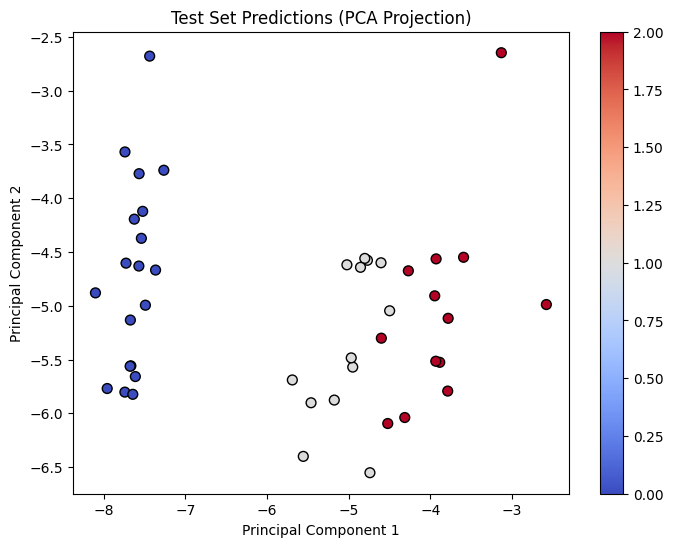

In [21]:
# Visualize the test set results
X_test_pca = pca.transform(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k', s=50)
plt.title('Test Set Predictions (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

In [22]:
# Example: Predicting the class of a new sample
new_sample = np.array([[5.0, 3.6, 1.4, 0.2]])
new_sample_std = scaler.transform(new_sample)
prediction = knn.predict(new_sample_std)
print(f"Predicted class for the new sample: {iris.target_names[prediction][0]}")

Predicted class for the new sample: setosa


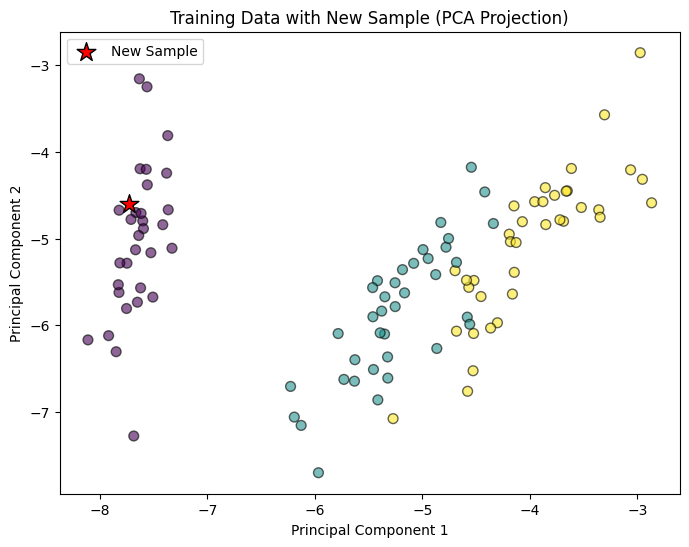

In [23]:
# Confirmatory step: Visualize the new sample in the context of the training data
X_train_pca = pca.transform(X_train)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50, alpha=0.6)
new_sample_pca = pca.transform(new_sample_std)
plt.scatter(new_sample_pca[:, 0], new_sample_pca[:, 1], c='red', edgecolor='k', s=200, marker='*', label='New Sample')
plt.title('Training Data with New Sample (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()